In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [91]:
df = pd.read_csv(r"C:\Users\User\Desktop\Nida\dads5001\public_150k_plus_230101.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

In [92]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'].str.upper()

0                   SUMTER
1         NORTH CHARLESTON
2                  SEATTLE
3           SAN BERNARDINO
4                      NaN
                ...       
968526              CASPER
968527         GREEN RIVER
968528               ROZET
968529            SHERIDAN
968530       TETON VILLAGE
Name: BorrowerCity, Length: 968531, dtype: object

In [93]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

0   2020-05-01
1   2020-05-01
2   2020-05-01
3   2020-05-01
4   2020-05-01
5   2020-05-01
6   2020-05-01
7   2020-05-01
8   2020-05-01
9   2020-05-01
Name: DateApproved, dtype: datetime64[ns]

In [94]:
#find NaN in data
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [95]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName','NonProfit','UTILITIES_PROCEED','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED','HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED','NonProfit'],axis=1)

In [96]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                 47
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
P

In [97]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"968,531.00","968,531.00"
mean,"532,253.66","530,622.09"
std,"744,251.43","737,887.06"
min,0.00,"150,000.00"
25%,"200,200.00","200,400.00"
50%,"295,177.00","295,000.00"
75%,"540,200.00","539,384.33"
max,"10,000,000.00","10,000,000.00"


<AxesSubplot: >

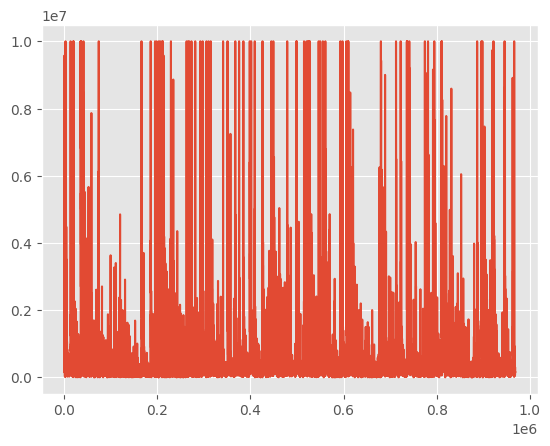

In [98]:
df['InitialApprovalAmount'].plot()

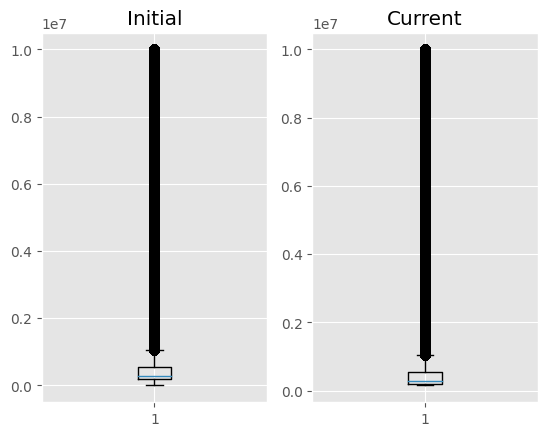

In [99]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

In [100]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df_ini = filter_outliner(df,'InitialApprovalAmount')
df_cur = filter_outliner(df,'CurrentApprovalAmount')

In [101]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
df['InitialApprovalAmount'].agg(['mean','count','max','min'])

mean       532,253.66
count      968,531.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

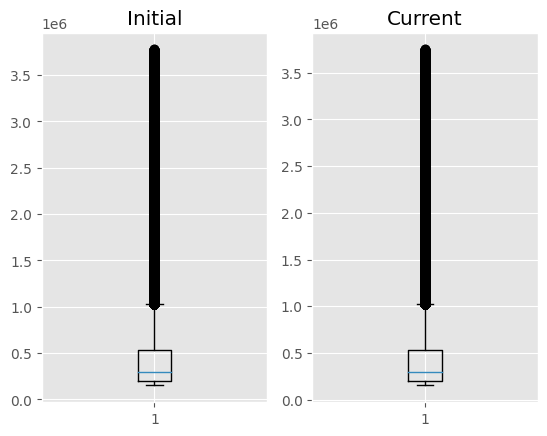

In [102]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df_ini['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df_cur['CurrentApprovalAmount'])
plt.title('Current')
plt.show()